In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from tqdm import tqdm
import os
import pickle

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
all_data = pd.concat([train, test], sort=False)

In [4]:
train.shape, test.shape

((4752, 60), (11520, 41))

In [5]:
print(f'Y18 count: {train["Y18"].count()}')
print(f'Y18 not null count(pct): {np.round(train["Y18"].count()/len(train)*100, 2)}%')

Y18 count: 432
Y18 not null count(pct): 9.09%


In [6]:
total = train.isnull().sum()
percent = (train.isnull().sum() / train.isnull().count()*100)

In [7]:
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).sort_values(by='Percent', ascending=False).head(30)

,Total,Percent
Y18,4320,90.909091
Y09,432,9.090909
Y00,432,9.090909
Y01,432,9.090909
Y02,432,9.090909
Y03,432,9.090909
Y05,432,9.090909
Y06,432,9.090909
Y07,432,9.090909
Y08,432,9.090909


X00~ X39까지는 null 값이 없으나, Y00~Y17은 432개의 row가 null, Y18은 432개를 제외한 모든 column이 null로 구성되어 있다.



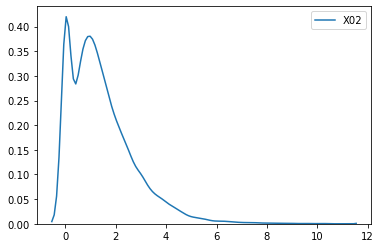

In [8]:
sns.kdeplot(all_data['X02']);

In [9]:
def show_plot(col_group):
    plt.plot(all_data[col_group])
    plt.show()
    sns.boxplot(x='variable', y='value', data=pd.melt(all_data[col_group]))
    plt.show()

In [10]:
def kde_plot(col_group):
    for col in col_group:
        sns.kdeplot(all_data[col], kernel='epa')
    plt.show()

In [11]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [12]:
pd.melt(df)

,variable,value
0,A,a
1,A,b
2,A,c
3,B,1
4,B,3
5,B,5
6,C,2
7,C,4
8,C,6


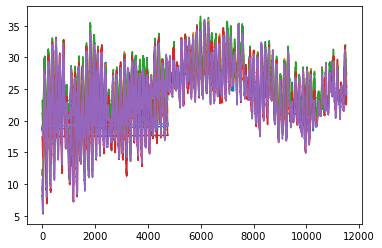

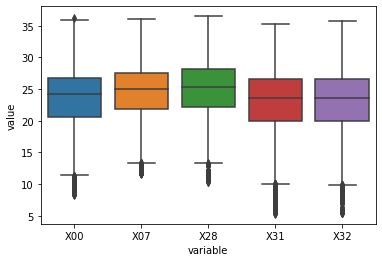

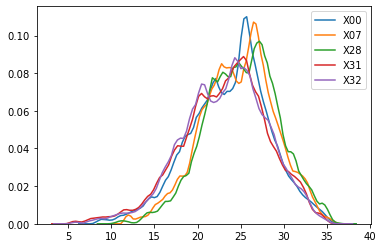

In [13]:
# 기온
group_1 = ['X00', 'X07', 'X28', 'X31', 'X32']
show_plot(group_1)
kde_plot(group_1)

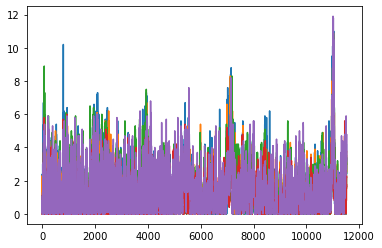

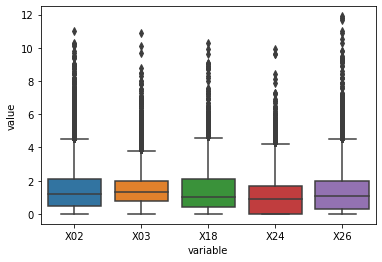

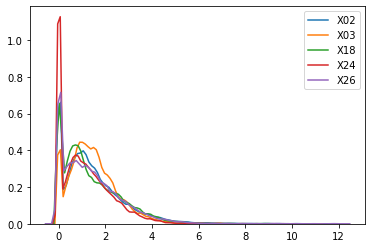

In [14]:
# 현지 기압
group_2 = ['X02', 'X03', 'X18', 'X24', 'X26']
show_plot(group_2)
kde_plot(group_2)

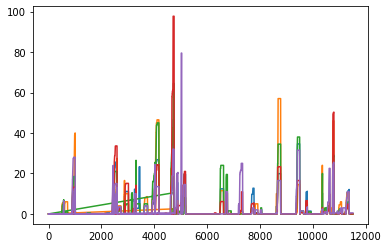

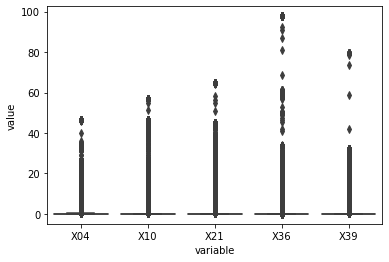

In [15]:
# 풍속
group_3 = ['X04', 'X10', 'X21', 'X36', 'X39']
show_plot(group_3)

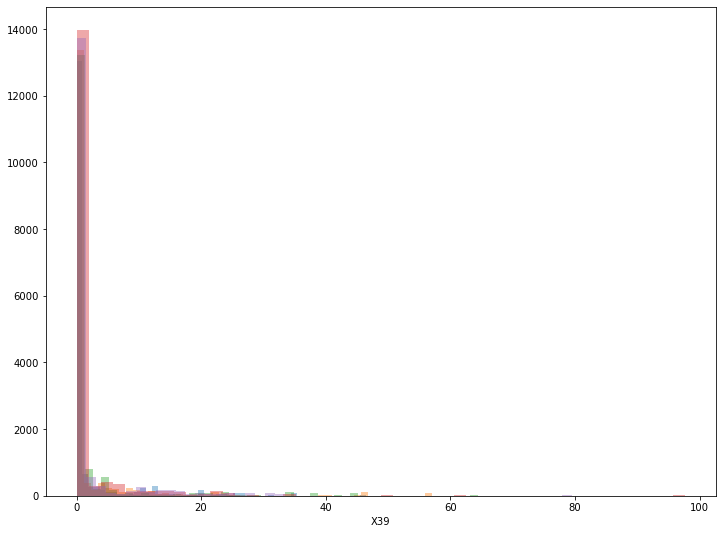

In [16]:
plt.figure(figsize=(12, 9))
for col in group_3:
    sns.distplot(all_data[col], kde=False)
plt.show()

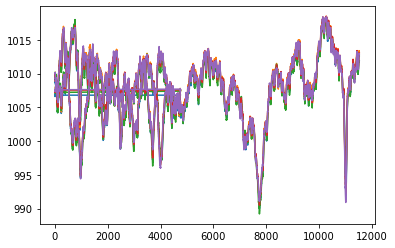

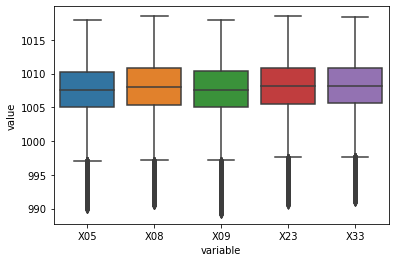

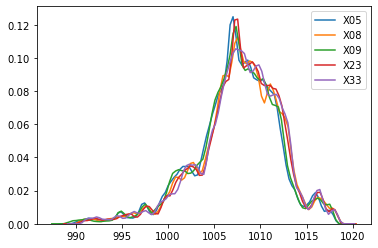

In [17]:
# 일일 누적강수량
group_4 = ['X05', 'X08', 'X09', 'X23', 'X33']
show_plot(group_4)
kde_plot(group_4)

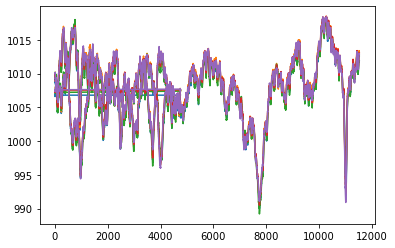

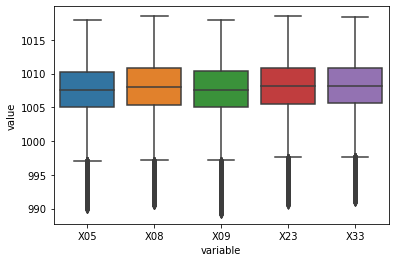

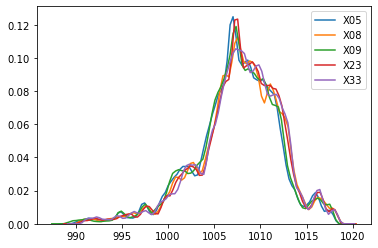

In [18]:
# 해면기압
group_5 = ['X05', 'X08', 'X09', 'X23', 'X33']
show_plot(group_5)
kde_plot(group_5)

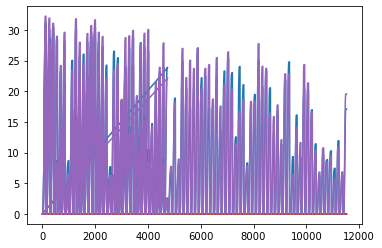

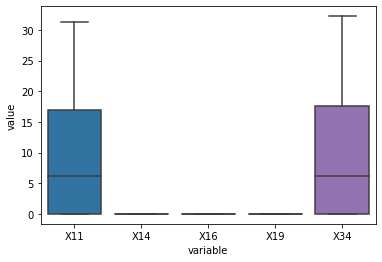

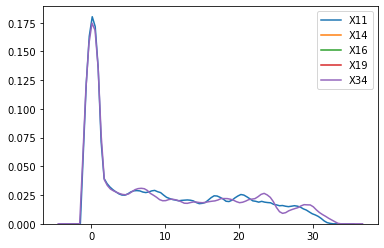

In [19]:
# 일일 누적일사량
group_6 = ['X11', 'X14', 'X16', 'X19', 'X34']
show_plot(group_6)
kde_plot(group_6)

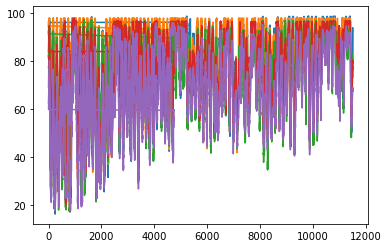

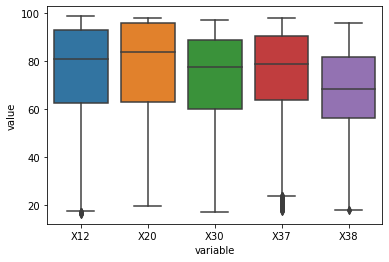

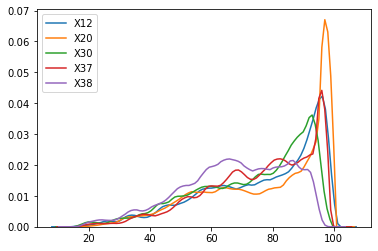

In [20]:
# 습도
group_7 = ['X12', 'X20', 'X30', 'X37', 'X38']
show_plot(group_7)
kde_plot(group_7)

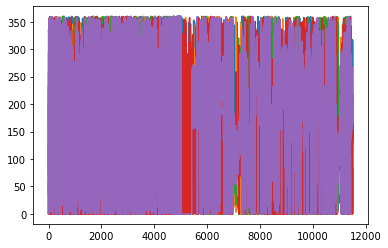

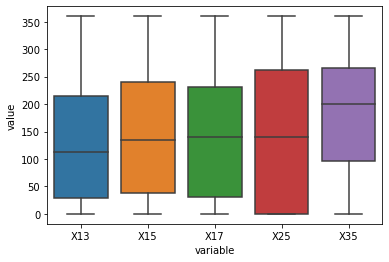

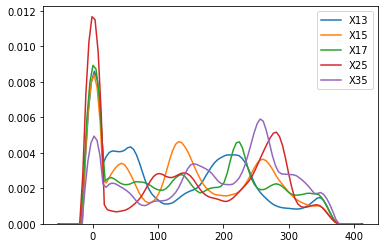

In [21]:
# 풍향
group_8 = ['X13', 'X15', 'X17', 'X25', 'X35']
show_plot(group_8)
kde_plot(group_8)

In [22]:
# Y00 ~ Y17 plot
col_y17 = []
for i in range(18):
    col_y17.append('Y{:02d}'.format(i))

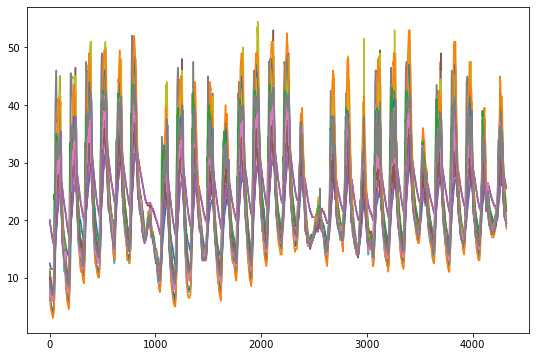

In [23]:
plt.figure(figsize=(9, 6))
plt.plot(all_data[col_y17])
plt.show()

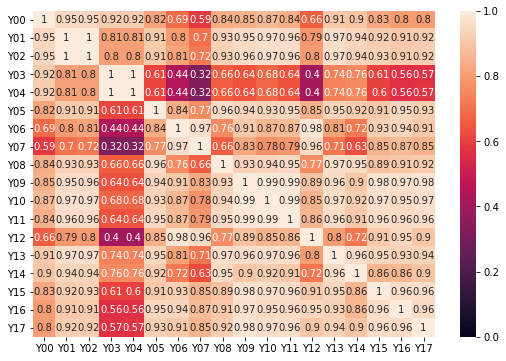

In [24]:
plt.figure(figsize=(9, 6))
sns.heatmap(all_data[col_y17].corr(), vmin=0, vmax=1, annot=True);

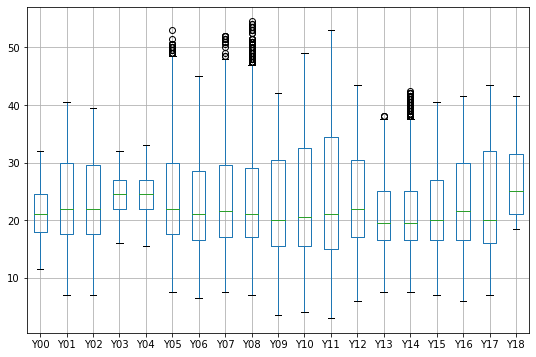

In [25]:
col_y18 = col_y17 + ['Y18']
plt.figure(figsize=(9, 6))
all_data[col_y18].boxplot()
plt.show()

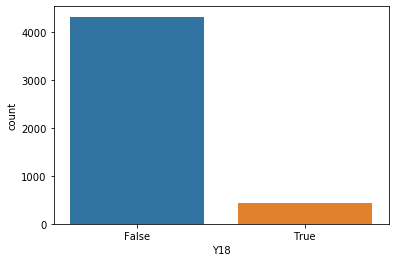

In [26]:
# Y18 (예측해야 하는 값)
sns.countplot(train['Y18'].notnull());

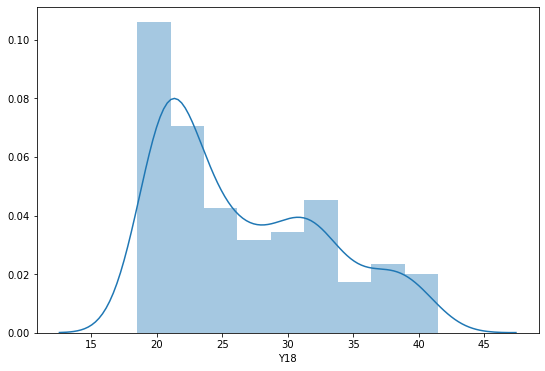

In [27]:
plt.figure(figsize=(9, 6))
sns.distplot(train.loc[train['Y18'].notnull()]['Y18'])
plt.show()

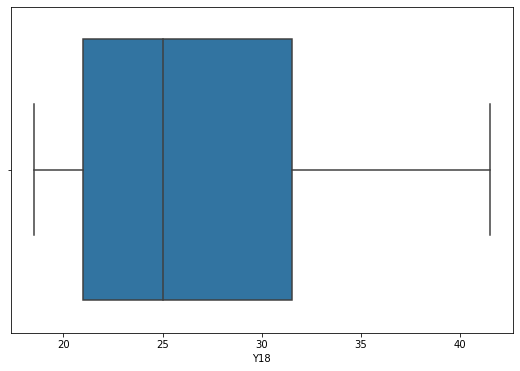

In [28]:
plt.figure(figsize=(9, 6))
sns.boxplot(train.loc[train['Y18'].notnull()]['Y18'])
plt.show()

# Y00~Y18 EDA

In [29]:
target = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08','Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18']
train[target].head()

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


해당 값들은 아래와 같은 특징을 띄고 있습니다.

1) Y18이 null 이면 Y0 ~ Y17은 not null

2) Y0 ~ Y17이 null 이면 Y18은 not null

In [30]:
# 1) Y18이 null => Y0 ~ Y17은 not null
temp = train[train['Y18'].isnull()]
temp.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


In [31]:
print(temp.iloc[:,-19:-1].isnull().any())

Y00    False
Y01    False
Y02    False
Y03    False
Y04    False
Y05    False
Y06    False
Y07    False
Y08    False
Y09    False
Y10    False
Y11    False
Y12    False
Y13    False
Y14    False
Y15    False
Y16    False
Y17    False
dtype: bool


In [32]:
# 2) Y0 ~ Y17이 null => Y18은 not null
temp = train[~train['Y18'].isnull()]

In [33]:
print(temp.iloc[:,-19:-1].isnull().any())

Y00    True
Y01    True
Y02    True
Y03    True
Y04    True
Y05    True
Y06    True
Y07    True
Y08    True
Y09    True
Y10    True
Y11    True
Y12    True
Y13    True
Y14    True
Y15    True
Y16    True
Y17    True
dtype: bool


test 데이터에서 우리가 실제로 예측해야하는 값은 Y00~Y17이 아닌 Y18입니다.

이에 우리는 Y00\~Y17만 있는 row는 Y18과 유사한 값을 가진 새로운 target attribute를 만들어줘야 합니다. 이를 위해 Y00\~Y17 vs Y18 사이에 관계를 살펴보겠습니다.

In [34]:
# Y18이 NOT NULL인 데이터
train[train['Y18'].notnull()]['Y18']

4320    20.5
4321    20.5
4322    20.5
4323    20.5
4324    20.5
        ... 
4747    21.5
4748    21.5
4749    21.5
4750    21.5
4751    21.0
Name: Y18, Length: 432, dtype: float64

In [35]:
y18 = train[train['Y18'].notnull()]['Y18'].reset_index(drop= True)
y18

0      20.5
1      20.5
2      20.5
3      20.5
4      20.5
       ... 
427    21.5
428    21.5
429    21.5
430    21.5
431    21.0
Name: Y18, Length: 432, dtype: float64

In [36]:
no_y18_target = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08','Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17']
no_y18 = train[(train['Y18'].isnull()) & (train['id'] > 3887)][no_y18_target].reset_index(drop = True)

In [37]:
no_y18

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
0,20.5,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.5,18.5,17.5,18.5,18.0,17.5,17.0,18.5,17.0
1,20.0,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.0,18.0,17.5,18.5,17.5,17.5,17.0,18.0,17.0
2,20.0,20.0,20.5,25.5,25.5,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.5,17.5,17.0,18.0,17.0
3,20.0,20.0,20.0,25.5,25.0,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.0,17.0,17.0,18.0,16.5
4,19.5,20.0,20.0,25.0,25.0,19.5,18.0,18.5,19.0,17.0,17.5,17.0,18.0,17.0,17.0,17.0,18.0,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,22.0,22.5,22.5,26.0,26.0,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.5,20.5,20.0,20.0,20.5,20.0
428,22.0,22.5,22.5,26.0,25.5,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.5,20.5,20.0,19.5,20.5,19.5
429,21.5,22.5,22.5,26.0,25.5,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.0,20.0,19.5,19.5,20.0,19.0
430,21.5,22.0,22.0,25.5,25.5,20.5,20.0,20.0,20.0,19.5,20.0,18.5,20.0,20.0,19.5,19.5,20.0,19.0


In [40]:
check_target = pd.concat([no_y18, y18], axis = 1)
check_target

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,20.5,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.5,18.5,17.5,18.5,18.0,17.5,17.0,18.5,17.0,20.5
1,20.0,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.0,18.0,17.5,18.5,17.5,17.5,17.0,18.0,17.0,20.5
2,20.0,20.0,20.5,25.5,25.5,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.5,17.5,17.0,18.0,17.0,20.5
3,20.0,20.0,20.0,25.5,25.0,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.0,17.0,17.0,18.0,16.5,20.5
4,19.5,20.0,20.0,25.0,25.0,19.5,18.0,18.5,19.0,17.0,17.5,17.0,18.0,17.0,17.0,17.0,18.0,16.5,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,22.0,22.5,22.5,26.0,26.0,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.5,20.5,20.0,20.0,20.5,20.0,21.5
428,22.0,22.5,22.5,26.0,25.5,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.5,20.5,20.0,19.5,20.5,19.5,21.5
429,21.5,22.5,22.5,26.0,25.5,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.0,20.0,19.5,19.5,20.0,19.0,21.5
430,21.5,22.0,22.0,25.5,25.5,20.5,20.0,20.0,20.0,19.5,20.0,18.5,20.0,20.0,19.5,19.5,20.0,19.0,21.5


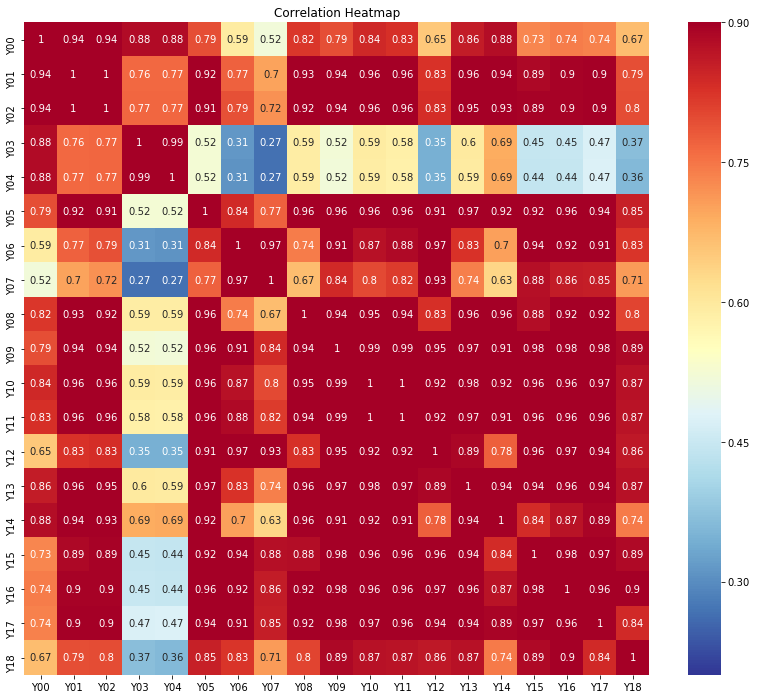

In [41]:
correlations =  check_target.corr()
plt.figure(figsize = (14, 12))

# Heatmap of correlations
sns.heatmap(correlations, cmap = plt.cm.RdYlBu_r,  vmin = 0.2, annot = True, vmax = 0.9)
plt.title('Correlation Heatmap');

Y18과 (Y03, Y04)는 상관관계가 다른 변수에 비해서 상당히 적은 것으로 보입니다.


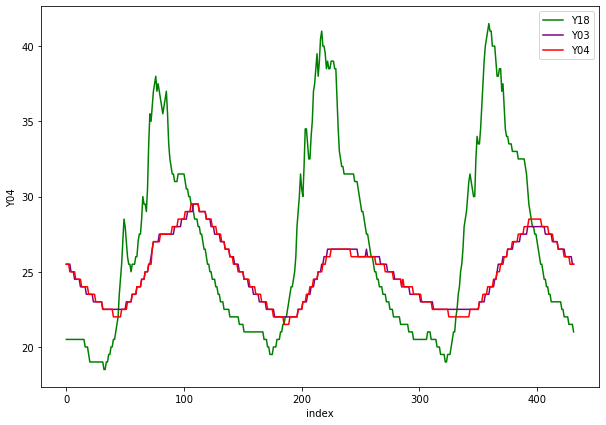

In [43]:
check_target.reset_index(inplace = True)

fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=check_target, x='index', y='Y18', color='green', ax=ax)
sns.lineplot(data=check_target, x='index', y='Y03', color='purple', ax=ax)
sns.lineplot(data=check_target, x='index', y='Y04', color='red', ax=ax)
plt.legend(['Y18', 'Y03', 'Y04'])
plt.show()

비교를 위해 correlation이 높은 장소를 가져오겠습니다. ( Y15, Y16)


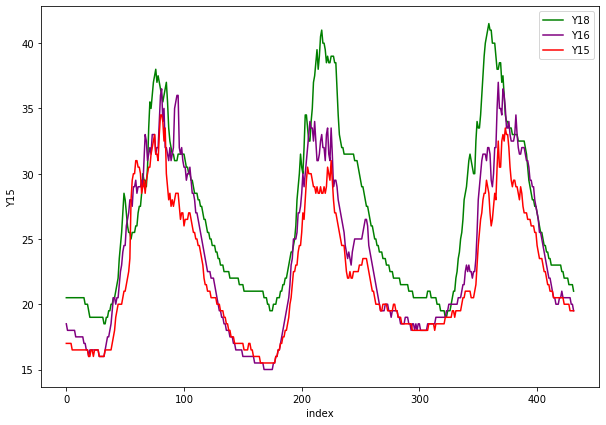

In [44]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=check_target, x='index', y='Y18', color='green', ax=ax)
sns.lineplot(data=check_target, x='index', y='Y16', color='purple', ax=ax)
sns.lineplot(data=check_target, x='index', y='Y15', color='red', ax=ax)
plt.legend(['Y18', 'Y16', 'Y15'])
plt.show()

### 결론
- Y00~Y18을 종합하여 하나의 target attribute를 만들어야 한다.
- Y18이 우리가 실제로 예측해야 할 장소이다.
- Y03과 Y04는 Y18과 다른 양상을 띄고 있다.
- 해당 장소들은 아예 삭제를 하고 분석을 진행하는 등의 어떠한 조치가 필요할 것으로 생각된다.